<a href="https://colab.research.google.com/github/Aniket-op/Face-Mask-Detection/blob/main/Face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

!ls

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 161M/163M [00:00<00:00, 276MB/s]
100% 163M/163M [00:00<00:00, 247MB/s]
The dataset is extracted
data  face-mask-dataset.zip  sample_data


In [ ]:
#Importing Dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
#Listing Files in Directories respectively (printing first and last 5 names of both folders)
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

# Length of Data set
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

['with_mask_3429.jpg', 'with_mask_268.jpg', 'with_mask_3706.jpg', 'with_mask_2037.jpg', 'with_mask_2034.jpg']
['with_mask_2658.jpg', 'with_mask_2637.jpg', 'with_mask_996.jpg', 'with_mask_2049.jpg', 'with_mask_796.jpg']
['without_mask_3011.jpg', 'without_mask_3052.jpg', 'without_mask_2315.jpg', 'without_mask_3000.jpg', 'without_mask_2511.jpg']
['without_mask_508.jpg', 'without_mask_3655.jpg', 'without_mask_564.jpg', 'without_mask_851.jpg', 'without_mask_2160.jpg']
Number of with mask images: 3725
Number of without mask images: 3828


> **Creating Labels for the two classes of Images**

1.   With Mask -> 1
2.   Without Mask ->  0



In [ ]:
# create the labels
with_mask_labels = [1]* len(with_mask_files)
without_mask_labels = [0]* len(without_mask_files)

print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


>**Display Image**



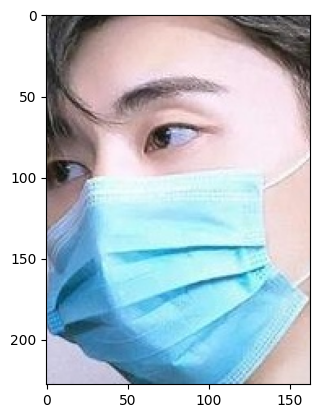

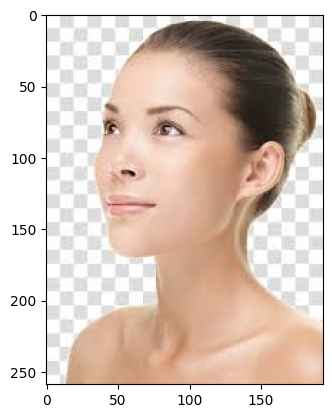

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

>**Image Processing**

1.   Resize the Images
2.   Convert the images to numpy arrays




In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


<class 'list'>
7553


array([[[ 38,  38,  43],
        [ 35,  35,  38],
        [ 33,  32,  37],
        ...,
        [ 54,  55,  59],
        [ 63,  64,  67],
        [ 99, 100, 100]],

       [[ 36,  39,  42],
        [ 32,  35,  37],
        [ 28,  27,  32],
        ...,
        [ 53,  54,  58],
        [ 74,  75,  78],
        [152, 154, 154]],

       [[ 32,  33,  36],
        [ 25,  25,  29],
        [ 20,  19,  24],
        ...,
        [ 53,  54,  58],
        [ 70,  71,  74],
        [126, 127, 127]],

       ...,

       [[ 11,   9,  10],
        [ 11,   9,  10],
        [ 14,  12,  13],
        ...,
        [  8,  58,  68],
        [  4,  34,  43],
        [  3,  14,  20]],

       [[  6,   4,   5],
        [  6,   4,   5],
        [  9,   6,   7],
        ...,
        [ 22,  90, 100],
        [ 11,  66,  77],
        [  6,  39,  47]],

       [[  4,   2,   3],
        [  4,   1,   2],
        [  4,   2,   3],
        ...,
        [ 31, 104, 117],
        [ 22,  89, 101],
        [ 12,  68,  78]]], dtype=uint8)
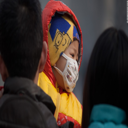

In [ ]:
print(type(data))
print(len(data))
data[0]

In [ ]:
# converting image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


># **Building a Convolutional Neural Networks (CNN)**


Epoch 1/30
189/189 [==============================] - 31s 157ms/step - loss: 0.8982 - accuracy: 0.8151 - val_loss: 0.3561 - val_accuracy: 0.9120 - lr: 0.0010
Epoch 2/30
189/189 [==============================] - 28s 149ms/step - loss: 0.3514 - accuracy: 0.9076 - val_loss: 0.3002 - val_accuracy: 0.9173 - lr: 0.0010
Epoch 3/30
189/189 [==============================] - 28s 149ms/step - loss: 0.2901 - accuracy: 0.9201 - val_loss: 0.2193 - val_accuracy: 0.9464 - lr: 0.0010
Epoch 4/30
189/189 [==============================] - 29s 151ms/step - loss: 0.2476 - accuracy: 0.9292 - val_loss: 0.1981 - val_accuracy: 0.9557 - lr: 0.0010
Epoch 5/30
189/189 [==============================] - 29s 152ms/step - loss: 0.2417 - accuracy: 0.9293 - val_loss: 0.2028 - val_accuracy: 0.9332 - lr: 0.0010
Epoch 6/30
189/189 [==============================] - 28s 148ms/step - loss: 0.2215 - accuracy: 0.9345 - val_loss: 0.1792 - val_accuracy: 0.9504 - lr: 0.0010
Epoch 7/30
189/189 [==============================] 

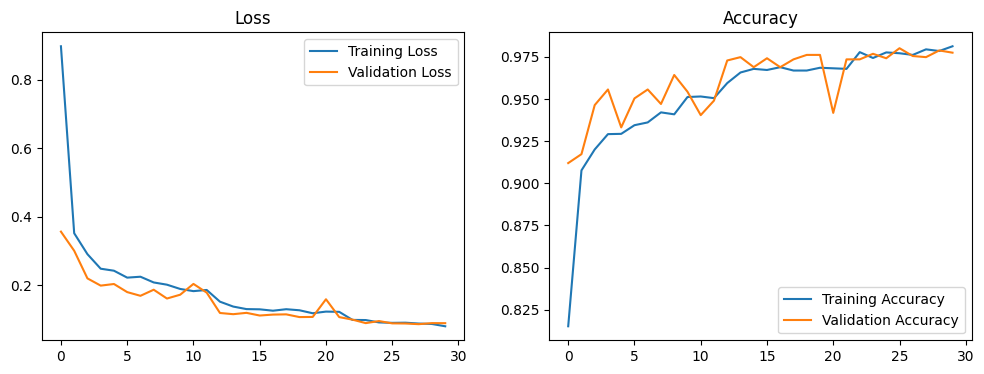

In [ ]:
# Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming X and Y are your data and labels
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Scale the data to the range 0-1
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

# Data Augmentation
data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
data_gen.fit(X_train_scaled)

# Build the improved CNN model
# Layers Overview:

# Conv2D: Extracts spatial features using filters.
# MaxPooling2D: Reduces spatial dimensions, retaining important information.
# Flatten: Converts 2D outputs to 1D for Dense layers.
# Dense: Fully connected layers for classification.
# Dropout: Prevents overfitting by randomly dropping connections.
# Softmax Activation: Outputs probabilities for each class.
# RELu: rectified linear unit

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

# Train the model
history = model.fit(
    data_gen.flow(X_train_scaled, Y_train, batch_size=32),
    validation_data=(X_test_scaled, Y_test),
    epochs=30,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Plot the training and validation loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()


1/1 [==============================] - 0s 122ms/step


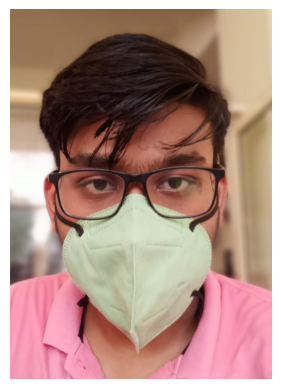

The person in the image is wearing a mask.
1/1 [==============================] - 0s 28ms/step


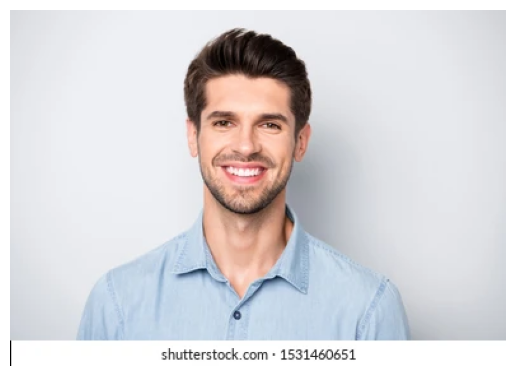

The person in the image is NOT wearing a mask.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_mask(image_path):
    # Load and preprocess the image
    image = cv2.imread(image_path)
    image_resized = cv2.resize(image, (128, 128))  # Resize to match model input shape
    image_scaled = image_resized / 255.0          # Scale the image
    image_reshaped = np.reshape(image_scaled, (1, 128, 128, 3))  # Reshape for model input

    # Predict with the model
    prediction = model.predict(image_reshaped)
    class_idx = np.argmax(prediction)  # Get index of the highest probability

    # Display the image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


    # Output result
    if class_idx == 1:
        print("The person in the image is wearing a mask.")
    else:
        print("The person in the image is NOT wearing a mask.")

# Example usage
predict_mask("/content/with_mask_image.jpg")
predict_mask("/content/with_mask_image3.jpg")





